# Logistic Regression for Cardiovascular Disease Classification

## Import Statements and FileIO

In [72]:
# Import relevant libraries
import pandas as pd
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [59]:
# read-in the dataframe to be used
df_cardio_org = pd.read_csv('supervisedLearning/Cardiovascular_Disease/cardio_dataset.csv', delimiter=';')

In [60]:
# display first 30 rows of read-in dataframe for future reference
df_cardio_org.head(30)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [61]:
# look at the descriptive statistics of the read-in dataframe
df_cardio_org.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## cardio_dataset.csv preprocessing

In [62]:
#Drop 'id' column
df_cardio_edits = df_cardio_org
df_cardio_edits.drop(['id'], axis=1, inplace=True)

# verify change occured
df_cardio_edits.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [63]:
# contstrain ap_hi to 0-300 -- removes outliers that are fictional data
df_cardio_edits = df_cardio_edits.drop(df_cardio_edits.index[df_cardio_edits['ap_hi']<0])
df_cardio_edits = df_cardio_edits.drop(df_cardio_edits.index[df_cardio_edits['ap_hi']>400])

# constrain ap_lo to 0-200 -- removes outliers that are fictional data
df_cardio_edits = df_cardio_edits.drop(df_cardio_edits.index[df_cardio_edits['ap_lo']<0])
df_cardio_edits = df_cardio_edits.drop(df_cardio_edits.index[df_cardio_edits['ap_lo']>300])

In [64]:
# Change the age (days) to categorical values 0 - 5
for i, row in df_cardio_edits.iterrows():

    if (df_cardio_edits.age[i] <= 4380): 
        df_cardio_edits.at[i,'age'] = 0 # children
    elif ((df_cardio_edits.age[i] >= 4381) & (df_cardio_edits.age[i] <= 6935)):
         df_cardio_edits.at[i, 'age'] = 1 # teenagers
    elif ((df_cardio_edits.age[i] >= 6936) & (df_cardio_edits.age[i] <= 12775)):
         df_cardio_edits.at[i, 'age'] = 2 # 20 - 35 years
    elif ((df_cardio_edits.age[i] >= 12776) & (df_cardio_edits.age[i] <= 18250)):
         df_cardio_edits.at[i, 'age'] = 3 # 35 - 50 years
    elif ((df_cardio_edits.age[i] >= 18251) & (df_cardio_edits.age[i] <= 23725)):
         df_cardio_edits.at[i, 'age'] = 4 # 50 - 65 years
    elif (df_cardio_edits.age[i] >= 23726):
         df_cardio_edits.at[i, 'age'] = 5 # 65 and above

# verify change occured
df_cardio_edits.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,4,2,168,62.0,110,80,1,1,0,0,1,0
1,4,1,156,85.0,140,90,3,1,0,0,1,1
2,4,1,165,64.0,130,70,3,1,0,0,0,1
3,3,2,169,82.0,150,100,1,1,0,0,1,1
4,3,1,156,56.0,100,60,1,1,0,0,0,0


In [65]:
# Create BMI column populated with NaN 
df_cardio_edits['BMI'] = np.nan

# Populate 'BMI' column with categorical values
for i, row in df_cardio_edits.iterrows():
     # BMI is weight in kilograms divided by height in meters squared
     df_cardio_edits.at[i,'BMI'] = round(df_cardio_edits.weight[i]/(((df_cardio_edits.at[i,'height']) / 100) * ((df_cardio_edits.at[i,'height']) / 100)), 3)
     #df_cardio_edits.at[i,'BMI'] = round(df_cardio_edits.weight[i]/((df_cardio_edits.at[i,'height']) / 1000), 1)

     # convert to categorical
     if df_cardio_edits.BMI[i] < 18.5:
          df_cardio_edits.at[i,'BMI'] = 0 #Underweight
     elif df_cardio_edits.BMI[i] >= 18.5 and df_cardio_edits.BMI[i] < 25:
          df_cardio_edits.at[i,'BMI'] = 1 #Normal
     elif df_cardio_edits.BMI[i] >= 25.0 and df_cardio_edits.BMI[i] < 30:
          df_cardio_edits.at[i,'BMI'] = 2 #Overweight
     elif df_cardio_edits.BMI[i] >= 30 and df_cardio_edits.BMI[i] < 35:
          df_cardio_edits.at[i,'BMI'] = 3 #Obese
     elif df_cardio_edits.BMI[i] >= 35 and df_cardio_edits.BMI[i] < 40:
          df_cardio_edits.at[i,'BMI'] = 4 #Obese+1
     elif df_cardio_edits.BMI[i] >= 40:
          df_cardio_edits.at[i,'BMI'] = 5 #Obese+2

# Convert 'BMI' column values to int
df_cardio_edits['BMI'] = df_cardio_edits['BMI'].apply(np.int64)

# verify change occured
df_cardio_edits.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,4,2,168,62.0,110,80,1,1,0,0,1,0,1
1,4,1,156,85.0,140,90,3,1,0,0,1,1,3
2,4,1,165,64.0,130,70,3,1,0,0,0,1,1
3,3,2,169,82.0,150,100,1,1,0,0,1,1,2
4,3,1,156,56.0,100,60,1,1,0,0,0,0,1


In [66]:
# look at the descriptive statistics of the read-in dataframe
df_cardio_edits.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000
mean,3.693029,1.348710,164.359725,74.118225,126.325145,81.332797,1.364377,1.225855,0.087870,0.053594,0.803290,0.494870,1.988812
std,0.461366,0.476565,8.204221,14.328629,17.721845,9.877680,0.678695,0.571809,0.283107,0.225217,0.397514,0.499977,1.031184
min,2.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,4.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
75%,4.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000
max,4.000000,2.000000,250.000000,200.000000,309.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [67]:
# Convert values under 'height' column to categorical values
for i, row in df_cardio_edits.iterrows():

    if (df_cardio_edits.height[i] <= 152.4): 
        df_cardio_edits.at[i,'height'] = 0 # short
    elif ((df_cardio_edits.height[i] >= 152.5) & (df_cardio_edits.height[i] <= 167.64)):
         df_cardio_edits.at[i,'height'] = 1 # average
    elif ((df_cardio_edits.height[i] >= 167.65) & (df_cardio_edits.height[i] <= 180.34)):
         df_cardio_edits.at[i,'height'] = 2 # above average
    elif ((df_cardio_edits.height[i] >= 180.35) & (df_cardio_edits.height[i] <= 195.58)):
         df_cardio_edits.at[i,'height'] = 3 # very tall
    elif ((df_cardio_edits.height[i] >= 195.59) & (df_cardio_edits.height[i] <= 213.36)):
         df_cardio_edits.at[i,'height'] = 4 # Shaq level
    elif (df_cardio_edits.height[i] >= 213.37):
         df_cardio_edits.at[i,'height'] = 5 # Monster

# df_cardio_edits['height'] = df_cardio_edits['height'].apply(np.int64)

# verify change occured
df_cardio_edits.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,4,2,2,62.0,110,80,1,1,0,0,1,0,1
1,4,1,1,85.0,140,90,3,1,0,0,1,1,3
2,4,1,1,64.0,130,70,3,1,0,0,0,1,1
3,3,2,2,82.0,150,100,1,1,0,0,1,1,2
4,3,1,1,56.0,100,60,1,1,0,0,0,0,1


In [68]:
# Create BP column
df_cardio_edits['BP'] = np.nan

# Populate 'BP' column with categorical values
for i, row in df_cardio_edits.iterrows():
    
    if df_cardio_edits.ap_hi[i] < 120 and df_cardio_edits.ap_lo[i] < 80:
        df_cardio_edits.at[i,'BP'] = 0 #Normal
    elif df_cardio_edits.ap_hi[i] >= 120 and df_cardio_edits.ap_hi[i] <= 129 and df_cardio_edits.ap_lo[i] < 80:
        df_cardio_edits.at[i,'BP'] = 1 #Elevated
    elif (df_cardio_edits.ap_hi[i] >= 130 and df_cardio_edits.ap_hi[i] <= 139) or (df_cardio_edits.ap_lo[i] >= 80 and df_cardio_edits.ap_lo[i] <= 89):
        df_cardio_edits.at[i,'BP'] = 2 # Hypertension stage 1
    elif (df_cardio_edits.ap_hi[i] >= 140 and df_cardio_edits.ap_hi[i] <= 180) or (df_cardio_edits.ap_lo[i] >= 90 and df_cardio_edits.ap_lo[i] <= 120):
        df_cardio_edits.at[i,'BP'] = 3 # Hypertension stage 2
    elif df_cardio_edits.ap_hi[i] > 180 or df_cardio_edits.ap_lo[i] > 120:
        df_cardio_edits.at[i,'BP'] = 4 # Hypertensive crisis

# verify change occured
df_cardio_edits.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BP
0,4,2,2,62.0,110,80,1,1,0,0,1,0,1,2.0
1,4,1,1,85.0,140,90,3,1,0,0,1,1,3,3.0
2,4,1,1,64.0,130,70,3,1,0,0,0,1,1,2.0
3,3,2,2,82.0,150,100,1,1,0,0,1,1,2,3.0
4,3,1,1,56.0,100,60,1,1,0,0,0,0,1,0.0


In [69]:
# view descriptive statistics again post pre-processing
df_cardio_edits.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BP
count,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000
mean,3.693029,1.348710,1.318841,74.118225,126.325145,81.332797,1.364377,1.225855,0.087870,0.053594,0.803290,0.494870,1.988812,1.915406
std,0.461366,0.476565,0.619512,14.328629,17.721845,9.877680,0.678695,0.571809,0.283107,0.225217,0.397514,0.499977,1.031184,0.914806
min,2.000000,1.000000,0.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
75%,4.000000,2.000000,2.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000
max,4.000000,2.000000,5.000000,200.000000,309.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000


## Train/Test Splits and LogRegr Model Instantiation

In [70]:
# make X,y train/test splits
X = df_cardio_edits.drop(["cardio"], axis=1) # data; ind. vars.
y = df_cardio_edits['cardio'] # target class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
# make the Logistic Regression classifier
drDiagnosis = LogisticRegression(random_state=0, max_iter=1000)

In [74]:
# fit the model to the training data
drDiagnosis.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [75]:
# make predictions from model on novel data: X_test
y_preds = drDiagnosis.predict(X_test)

In [76]:
# Return the mean accuracy on the given test data and labels.
drDiagnosis.score(X_test, y_test)

0.7209420289855073

## Obtain the Performance Metrics

In [77]:
# write function to determine accuracy using numpy arrays 
# of y_test.values and y_preds
def get_accuracy(array_one, array_two):
    # check if arrays not equal and break with value one returned if score
    if (len(array_one)!=len(array_two)):
        return -1
    num_equal = 0
    for index in range(len(array_one)):
        if (array_one[index]==array_two[index]):
            num_equal += 1
    accuracy = num_equal / len(array_one)
    return accuracy


In [78]:
# calculate and display the accuracy of the model
accuracy = get_accuracy(y_test.values, y_preds)
print("Accuracy of LogRegr_Classifier: {0}".format(accuracy))

Accuracy of LogRegr_Classifier: 0.7209420289855073


In [79]:
# obtain TN, FP, FN, TP w/ confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test.values, y_preds).ravel()

Equations:

Precision = TP/TP + FP

Recall = TP/TP + FN

F1 = 2PR/P + R

In [80]:
# Compute and Display precision of LogRegr model
precision = tp/(tp+fp)
print("Precision: {0}".format(precision))

Precision: 0.7478025693035835


In [81]:
# Compute and Display recall of LogRegr model
recall = tp/(tp+fn)
print("Recall: {0}".format(recall))

Recall: 0.6522187822497421


In [82]:
# Compute and Display f1_score of LogRegr model
f1_score = (2*precision*recall)/(precision+recall)
print("f1_score: {0}".format(f1_score))

f1_score: 0.696747775415387


In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7017
           1       0.75      0.65      0.70      6783

    accuracy                           0.72     13800
   macro avg       0.72      0.72      0.72     13800
weighted avg       0.72      0.72      0.72     13800



In [84]:
#roc_curve(y_test, y_preds)
fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
roc_auc = auc(fpr, tpr)
print("AUROC of NB Model: ", roc_auc)

AUROC of NB Model:  0.7197961518488272


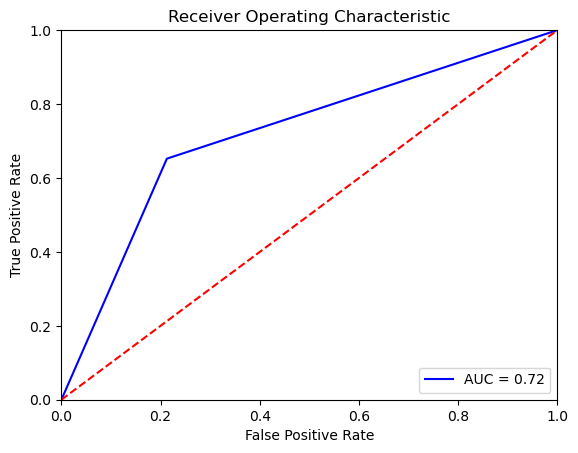

In [85]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Save the Model

In [86]:
#Saving the LogRegr Model
Cardio_LogRegr = 'supervisedLearning/models/drDiagnosis_LogRegr_cardio.sav'
pickle.dump(drDiagnosis, open(Cardio_LogRegr, 'wb'))

In [26]:
# To Load the Model in user-interface script:
# loaded_model = pickle.load(open(cardio_LogRegr, 'rb'))